<a href="https://colab.research.google.com/github/fidamaisahana/MachineLearning/blob/main/Classification/Simple_DecisionTree_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Definisikan dataset
data = {
    'Nama': ['Ali', 'Edi', 'Annie', 'Budiman', 'Herman', 'Didi', 'Rina', 'Gatot'],
    'Usia': ['muda', 'muda', 'muda', 'tua', 'tua', 'muda', 'tua', 'tua'],
    'Berat': ['overweight', 'underweight', 'average', 'overweight', 'overweight', 'underweight', 'overweight', 'average'],
    'Kelamin': ['pria', 'pria', 'wanita', 'pria', 'pria', 'pria', 'wanita', 'pria'],
    'Hipertensi': ['ya', 'tidak', 'tidak', 'tidak', 'ya', 'tidak', 'ya', 'tidak']
}

df = pd.DataFrame(data)
print(df)



      Nama  Usia        Berat Kelamin Hipertensi
0      Ali  muda   overweight    pria         ya
1      Edi  muda  underweight    pria      tidak
2    Annie  muda      average  wanita      tidak
3  Budiman   tua   overweight    pria      tidak
4   Herman   tua   overweight    pria         ya
5     Didi  muda  underweight    pria      tidak
6     Rina   tua   overweight  wanita         ya
7    Gatot   tua      average    pria      tidak


In [ ]:

# Encode the categorical features to numeric values
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Split the dataset into features and target variable
X = df_encoded.drop(['Nama', 'Hipertensi'], axis=1)
y = df_encoded['Hipertensi']



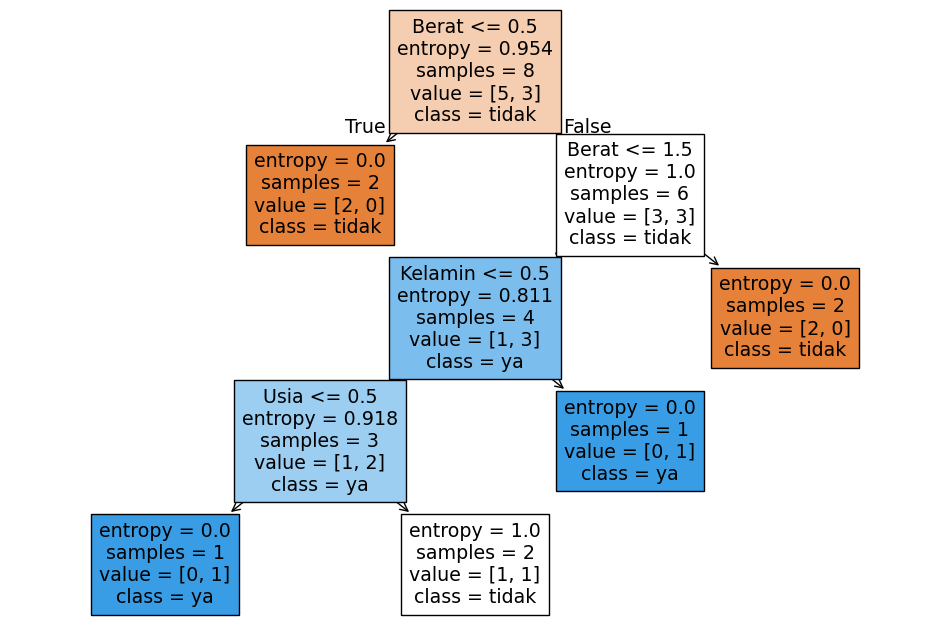

|--- Berat <= 0.50
|   |--- class: 0
|--- Berat >  0.50
|   |--- Berat <= 1.50
|   |   |--- Kelamin <= 0.50
|   |   |   |--- Usia <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Usia >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Kelamin >  0.50
|   |   |   |--- class: 1
|   |--- Berat >  1.50
|   |   |--- class: 0



In [ ]:
# Create Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifier
clf = clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['Usia', 'Berat', 'Kelamin'], class_names=['tidak', 'ya'], filled=True)
plt.show()

# Print the decision rules
text_representation = tree.export_text(clf, feature_names=['Usia', 'Berat', 'Kelamin'])
print(text_representation)